# Premiere Project: DIVORCE PREDICTION

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#model">Modelling</a></li>
  
</ul>

<a id='intro'></a>
## INTRODUCTION

### Data Description :

The Divorce Prediction dataset contains information about the answers to the 54 questions asked from 150 married people  Each question had different probabilities of impact. Answers are on a 5-point scale (0 = Never, 1 = Rarely, 2 = Average, 3 = Often, 4 = Always). We can use this dataset to predict whether a married couple will divorce.The dataset was sourced from Kaggle website.The 54 variables or questions called data dictionary are:

1. Q1= If one of us apologizes when our discussion deteriorates, the discussion ends.

2. Q2= I know we can ignore our differences, even if things get hard sometimes.

3. Q3= When we need it, we can take our discussions with my spouse from the beginning and correct it.

4. Q4= When I discuss with my spouse, contacting him will eventually work.

5. Q5= The time I spent with my wife is special for us.

6. Q6= We don't have time at home as partners.

7. Q7= We are like two strangers who share the same environment at home rather than family.

8. Q8= I enjoy our holidays with my wife.

9. Q9= I enjoy traveling with my wife.

10. Q10= Most of our goals are common to my spouse.

11. Q11= I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.

12. Q12= My spouse and I have similar values in terms of personal freedom.

13. Q13= My spouse and I have similar sense of entertainment.

14. Q14= Most of our goals for people (children, friends, etc.) are the same.

15. Q15= Our dreams with my spouse are similar and harmonious.

16. Q16= We're compatible with my spouse about what love should be.

17. Q17= We share the same views about being happy in our life with my spouse

18. Q18= My spouse and I have similar ideas about how marriage should be

19. Q19= My spouse and I have similar ideas about how roles should be in marriage

20. Q20= My spouse and I have similar values in trust.

21. Q21= I know exactly what my wife likes.

22. Q22= I know how my spouse wants to be taken care of when she/he sick.

23. Q23= I know my spouse's favorite food.

24. Q24= I can tell you what kind of stress my spouse is facing in her/his life.

25. Q25= I have knowledge of my spouse's inner world.

26. Q26= I know my spouse's basic anxieties.

27. Q27= I know what my spouse's current sources of stress are.

28. Q28= I know my spouse's hopes and wishes.

29. Q29= I know my spouse very well.

30. Q30= I know my spouse's friends and their social relationships.

31. Q31= I feel aggressive when I argue with my spouse.

32. Q32= When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .

33. Q33= I can use negative statements about my spouse's personality during our discussions.

34. Q34= I can use offensive expressions during our discussions.

35. Q35= I can insult my spouse during our discussions.

36. Q36= I can be humiliating when we discussed.

37. Q37= My discussion with my spouse is not calm.

38. Q38= I hate my spouse's way of open a subject.

39. Q39= Our discussions often occur suddenly.

40. Q40= We're just starting a discussion before I know what's going on.

41. Q41= When I talk to my spouse about something, my calm suddenly breaks.

42. Q42= When I argue with my spouse, ı only go out and I don't say a word.

43. Q43= I mostly stay silent to calm the environment a little bit.

44. Q44= Sometimes I think it's good for me to leave home for a while.

45. Q45= I'd rather stay silent than discuss with my spouse.

46. Q46= Even if I'm right in the discussion, I stay silent to hurt my spouse.

47. Q47= When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.

48. Q48= I feel right in our discussions.

49. Q49= I have nothing to do with what I've been accused of.

50. Q50= I'm not actually the one who's guilty about what I'm accused of.

51. Q51= I'm not the one who's wrong about problems at home.

52. Q52= I wouldn't hesitate to tell my spouse about her/his inadequacy.

53. Q53= When I discuss, I remind my spouse of her/his inadequacy.

54. Q54= I'm not afraid to tell my spouse about her/his incompetence.

### Question(s) for Analysis
<P>These are a few questions intended to be derived from the analysis:</P>
<ol>
    <li>How each question relates with Divorce column</li> 
    <li>What decisions are popular across divorces</li>
    <li>What decisions are popular across everyone</li>
    <li>Correlation between questions</li>
    <li>What's the most agreeable question</li>
    <li>What are the most important questions</li>
</ol>

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statistics

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Read in our dataset
divorce = pd.read_csv('divorce_data.csv', sep = ';')
ref = pd.read_csv('reference.tsv', sep = '\t')

In [3]:
divorce.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
#We check out the first 20 entries in our ref dataset
ref['atribute_id|description'].head(20)

0     1|If one of us apologizes when our discussion ...
1     2|I know we can ignore our differences, even i...
2     3|When we need it, we can take our discussions...
3     4|When I discuss with my spouse, to contact hi...
4     5|The time I spent with my wife is special for...
5             6|We don't have time at home as partners.
6     7|We are like two strangers who share the same...
7                  8|I enjoy our holidays with my wife.
8                     9|I enjoy traveling with my wife.
9         10|Most of our goals are common to my spouse.
10    11|I think that one day in the future, when I ...
11    12|My spouse and I have similar values in term...
12    13|My spouse and I have similar sense of enter...
13    14|Most of our goals for people (children, fri...
14    15|Our dreams with my spouse are similar and h...
15    16|We're compatible with my spouse about what ...
16    17|We share the same views about being happy i...
17    18|My spouse and I have similar ideas abou

In [5]:
divorce.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [6]:
#We clean up the dataset
def split_feat(data):
    feat = data['atribute_id|description']
    return feat.split('|')[0]
ref['attribute_id'] = ref.apply(split_feat, axis =1)

def split_feat2(data):
    feat = data['atribute_id|description']
    return feat.split('|')[1]
ref['description']= ref.apply(split_feat2, axis = 1)

ref.drop('atribute_id|description', axis = 1, inplace = True)

In [7]:
ref['features'] = divorce.drop('Divorce', axis = 1).columns

In [9]:
#We check basic information of our dataset
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [10]:
#We check the number of duplicates in the dataset
divorce[divorce.duplicated(keep='first') == True]['Divorce'].count()

20

In [11]:
#We remove the duplicates in our dataset
divorce = divorce[divorce.duplicated(keep='first') != True].reset_index()
divorce.drop('index', axis = 1, inplace = True)

In [12]:
#we create a copy of our dataset to carry out exploratory data analysis
df_copy = divorce.copy()

<a id='eda'></a>
## Exploratory Data Analysis

In [13]:
# Percentages of each choices for each feature
atr='''
1 If one of us apologizes when our discussion deteriorates, the discussion ends.
2 I know we can ignore our differences, even if things get hard sometimes.
3 When we need it, we can take our discussions with my spouse from the beginning and correct it.
4 When I discuss with my spouse, to contact him will eventually work.
5 The time I spent with my wife is special for us.
6 We don't have time at home as partners.
7 We are like two strangers who share the same environment at home rather than family.
8 I enjoy our holidays with my wife.
9 I enjoy traveling with my wife.
10 Most of our goals are common to my spouse.
11 I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12 My spouse and I have similar values in terms of personal freedom.
13 My spouse and I have similar sense of entertainment.
14 Most of our goals for people (children, friends, etc) are the same.
15 Our dreams with my spouse are similar and harmonious.
16 We're compatible with my spouse about what love should be.
17 We share the same views about being happy in our life with my spouse.
18 My spouse and I have similar ideas about how marriage should be.
19 My spouse and I have similar ideas about how roles should be in marriage.
20 My spouse and I have similar values in trust.
21 I know exactly what my wife likes.
22 I know how my spouse wants to be taken care of when she/he sick.
23 I know my spouse's favorite food.
24 I can tell you what kind of stress my spouse is facing in her/his life.
25 I have knowledge of my spouse's inner world.
26 I know my spouse's basic anxieties.
27 I know what my spouse's current sources of stress are.
28 I know my spouse's hopes and wishes.
29 I know my spouse very well.
30 I know my spouse's friends and their social relationships.
31 I feel aggressive when I argue with my spouse.
32 When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33 I can use negative statements about my spouse's personality during our discussions.
34 I can use offensive expressions during our discussions.
35 I can insult my spouse during our discussions.
36 I can be humiliating when we discussions.
37 My discussion with my spouse is not calm.
38 I hate my spouse's way of open a subject.
39 Our discussions often occur suddenly.
40 We're just starting a discussion before I know what's going on.
41 When I talk to my spouse about something, my calm suddenly breaks.
42 When I argue with my spouse, ı only go out and I don't say a word.
43 I mostly stay silent to calm the environment a little bit.
44 Sometimes I think it's good for me to leave home for a while.
45 I'd rather stay silent than discuss with my spouse.
46 Even if I'm right in the discussion, I stay silent to hurt my spouse.
47 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48 I feel right in our discussions.
49 I have nothing to do with what I've been accused of.
50 I'm not actually the one who's guilty about what I'm accused of.
51 I'm not the one who's wrong about problems at home.
52 I wouldn't hesitate to tell my spouse about her/his inadequacy.
53 When I discuss, I remind my spouse of her/his inadequacy.
54 I'm not afraid to tell my spouse about her/his incompetence.'''

quest=[]
line=""
for s in atr:
    if s=="\n":continue
    line=line+s
    if s==".":
        quest.append(line)
        line=""


cols=df_copy.drop("Divorce",axis=1).columns
perc={}
for col in cols:
    perc[col]=round(df_copy[col].value_counts(normalize=True)*100,2)
result=pd.DataFrame(perc).T
result.index=quest

result.style\
    .highlight_max(color = 'lightblue',axis=1)\
    .highlight_min(color = 'lightgreen',axis=1)\
    .format('{:.0f}%')

,0,1,2,3,4
"1 If one of us apologizes when our discussion deteriorates, the discussion ends.",45%,6%,9%,24%,16%
"2 I know we can ignore our differences, even if things get hard sometimes.",38%,15%,15%,21%,11%
"3 When we need it, we can take our discussions with my spouse from the beginning and correct it.",33%,15%,16%,25%,10%
"4 When I discuss with my spouse, to contact him will eventually work.",49%,8%,13%,18%,12%
5 The time I spent with my wife is special for us.,53%,7%,5%,22%,13%
6 We don't have time at home as partners.,52%,29%,15%,3%,1%
7 We are like two strangers who share the same environment at home rather than family.,70%,21%,3%,3%,3%
8 I enjoy our holidays with my wife.,53%,6%,10%,21%,10%
9 I enjoy traveling with my wife.,55%,4%,8%,23%,10%
10 Most of our goals are common to my spouse.,40%,12%,19%,19%,10%


In [14]:
# Popularity of choices for questions
qAgreable ={}
for i in df_copy.columns:
    qAgreable[i] = statistics.mode(df_copy[i])
    
QAG = pd.Series(qAgreable)

In [15]:
QAG =  pd.DataFrame(QAG, columns=['pop_answer'])
Most_ag = QAG[QAG.pop_answer >0]
Most_ag

,pop_answer
Q43,4
Q45,4
Q46,3
Q47,4
Q48,3
Q49,4
Q50,4
Q51,2
Q52,4
Q53,4


Most people whether divorced or not disagree with the questions except 'Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53'

## Distrubution of Divorce

0    0.56
1    0.44
Name: Divorce, dtype: float64


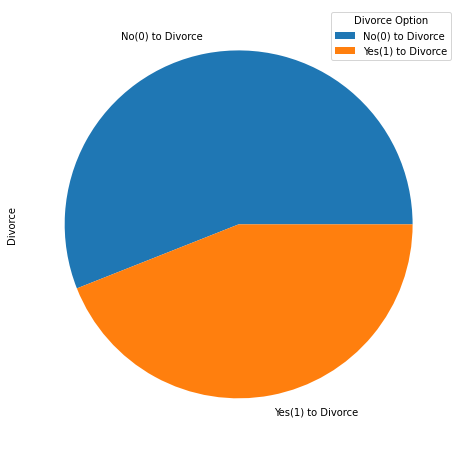

In [16]:
print(df_copy.Divorce.value_counts(normalize  = True))
my_labels=('No(0) to Divorce','Yes(1) to Divorce')
divorce.Divorce.value_counts().plot(kind='pie',figsize=(8,8),labels=my_labels,);

plt.legend(title= 'Divorce Option')


We can see from the data that there is a high rate of 56% for people who are not divorced while 44% of divorced people

## Distribution of answers across the data set

<AxesSubplot:>

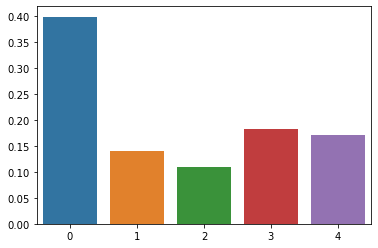

In [17]:
cols=df_copy.columns
perc={}
for col in cols:
    perc[col]=divorce[col].value_counts()
result=pd.DataFrame(perc).T
result.index=cols

result.style\
    .highlight_max(color = 'lightblue',axis=1)\
    .highlight_min(color = 'lightgreen',axis=1)

Resultv = result

tots = [Resultv[i].sum() for i in Resultv.columns]
ptots = [x/sum(tots) for x in tots]
sns.barplot(x=[0,1,2,3,4],y=ptots)

## Correlation between amount of positive/negative answers and amount of divorced individuals

<AxesSubplot:>

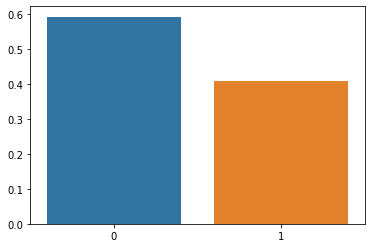

In [18]:
#pecerntage of positive or negative answers
tot = []
tot.append(tots[0]+tots[1]+(tots[2]/2))
tot.append(tots[3]+tots[4]+(tots[2]/2))
tots = tots[0:2]
ptots = [x/sum(tot) for x in tot]
sns.barplot(x=[0,1],y=ptots)

<AxesSubplot:>

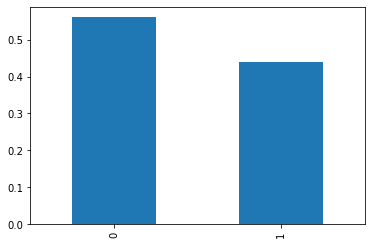

In [19]:
df_copy['Divorce'].value_counts(normalize=True).plot(kind='bar')

In [20]:
div = df_copy['Divorce'].value_counts(normalize=True)
div
ptots

[0.5917575757575757, 0.40824242424242424]

We can infer that there's a strong correlation between amount of positive answers and amount of divorced people
on average across the set of questions, the more positive answers the more chances of a divorce 

## Correlation between questions

In [21]:
col_names = df_copy.drop('Divorce',axis = 1).columns

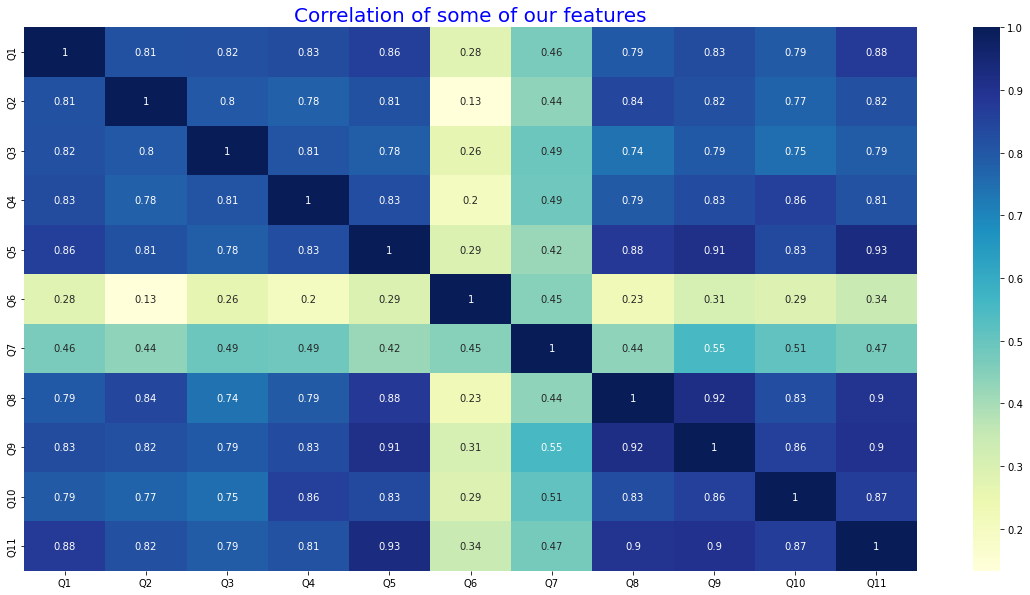

In [22]:
#Next, we check the correlation of our dataset
plt.figure(figsize=(20,10))
plt.title('Correlation of some of our features',size=20, color = 'blue')
sns.heatmap(df_copy.iloc[:, :11].corr(), 
            annot = True, cmap="YlGnBu",fmt='.2g');

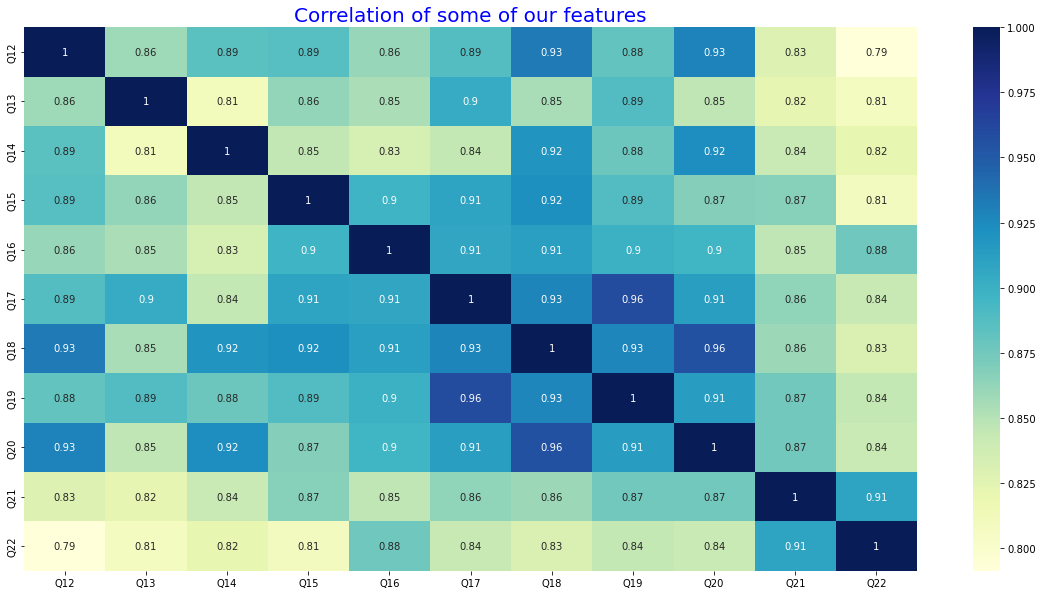

In [23]:
plt.figure(figsize=(20,10))
plt.title('Correlation of some of our features',size=20, color = 'blue')
sns.heatmap(df_copy.iloc[:, 11:22].corr(), 
            annot = True, cmap="YlGnBu",fmt='.2g');

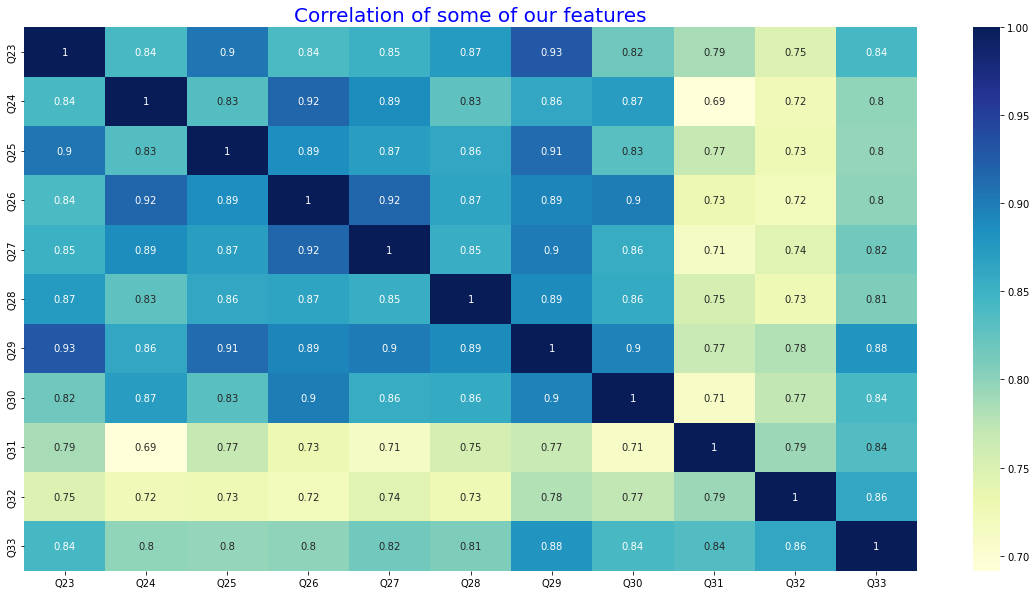

In [24]:
plt.figure(figsize=(20,10))
plt.title('Correlation of some of our features',size=20, color = 'blue')
sns.heatmap(df_copy.iloc[:, 22:33].corr(), 
            annot = True, cmap="YlGnBu",fmt='.2g');

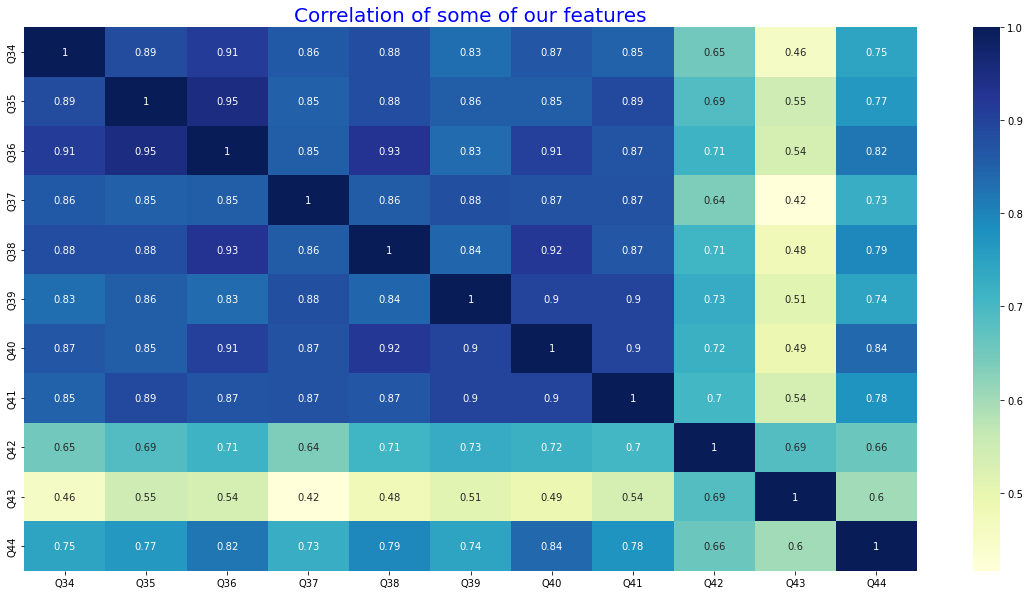

In [25]:
plt.figure(figsize=(20,10))
plt.title('Correlation of some of our features',size=20, color = 'blue')
sns.heatmap(df_copy.iloc[:, 33:44].corr(), 
            annot = True, cmap="YlGnBu",fmt='.2g');


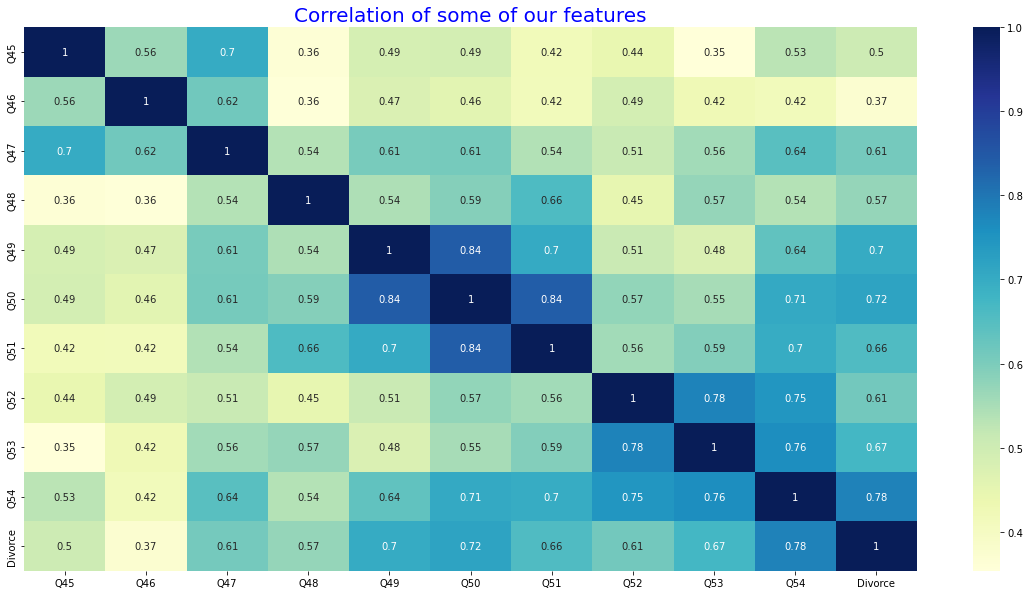

In [26]:
plt.figure(figsize=(20,10))
plt.title('Correlation of some of our features',size=20, color = 'blue')
sns.heatmap(df_copy.iloc[:, 44:55].corr(), 
            annot = True, cmap="YlGnBu",fmt='.2g');

## Top 10 correlated questions with Divorce

<AxesSubplot:ylabel='correlation'>

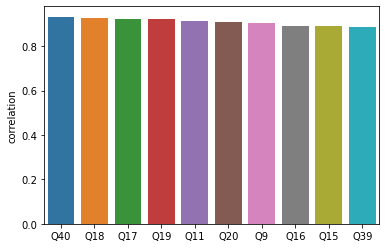

In [27]:
corr_dic = {}
for i in df_copy.columns:
    corr = df_copy[df_copy[[i,'Divorce']].columns].corr()
    corr_dic[i] = corr.iloc[0,1]
    
corr_df = pd.DataFrame(corr_dic, index = ['correlation'])
corr_df  = corr_df.T.sort_values('correlation',ascending = False)
corr_df_10 = corr_df.drop('Divorce',axis = 0).iloc[:10,:]

sns.barplot(x=corr_df_10.index,y='correlation',data=corr_df_10)

We can see that Q40 which had 47% of people choosing the <b>Never</b> option is the most correlated question with Divorce

In [28]:
#Getting questions where only divorcees answer with Frequently & Always
val_q = {}
for i in df_copy.drop('Divorce',axis = 1).columns:
    x,y = i, 'Divorce'

    df1 = df_copy.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    val_q[i] = df1[i].count()
    
Q_with_def_ans = [k for k,v in val_q.items() if v <9]

In [29]:
print(f'From the observation it is seen that questions {Q_with_def_ans} had only divorcees answer with Frequently and Always')

From the observation it is seen that questions ['Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q35', 'Q36', 'Q40'] had only divorcees answer with Frequently and Always


## Distribution of Questions with Divorce

In [30]:
def percent_dis_q_divorce(i):
    x,y = i, 'Divorce'

    df1 = df_copy.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    sns.catplot(x=x,y='percent',col = y,kind='bar',data=df1).fig.suptitle('perrcent dist of ' + i +" with Divorce")

def dis_q_divorce(i):
    sns.catplot(x=i, col="Divorce",data=df_copy, kind="count").fig.suptitle('dist of ' + i +" with Divorce")

/Users/babs/tensorflow-test/ML-env/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


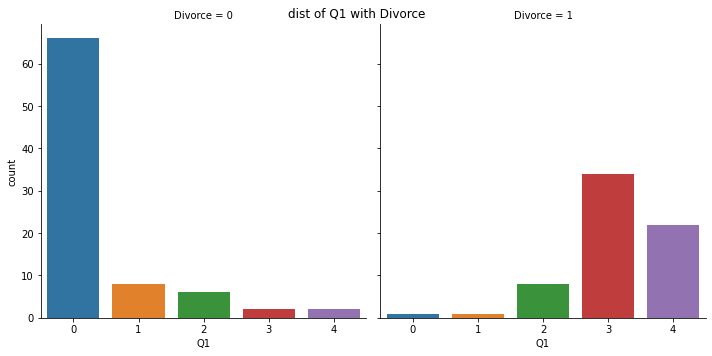

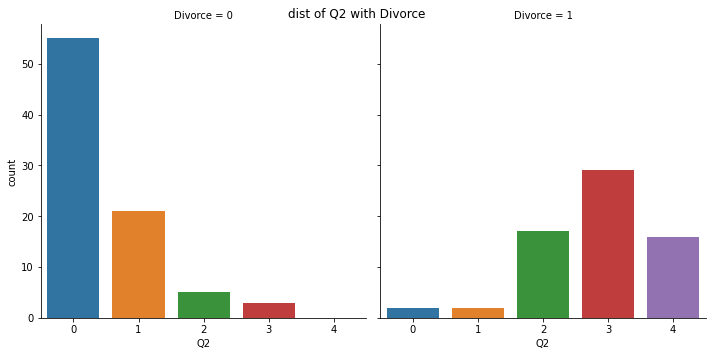

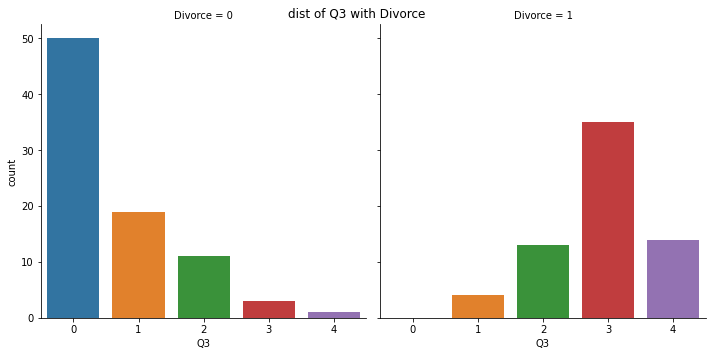

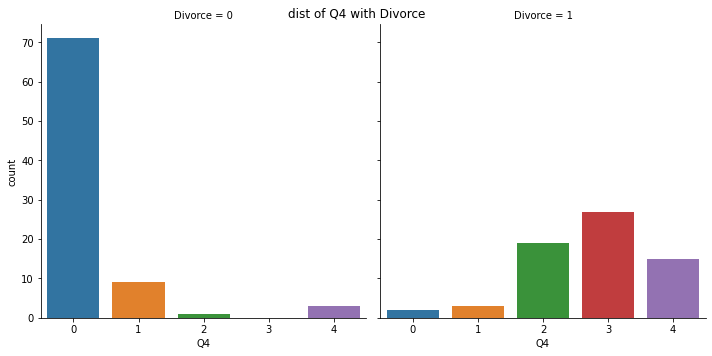

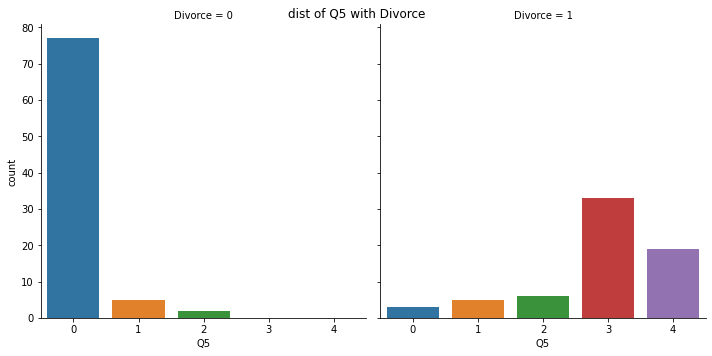

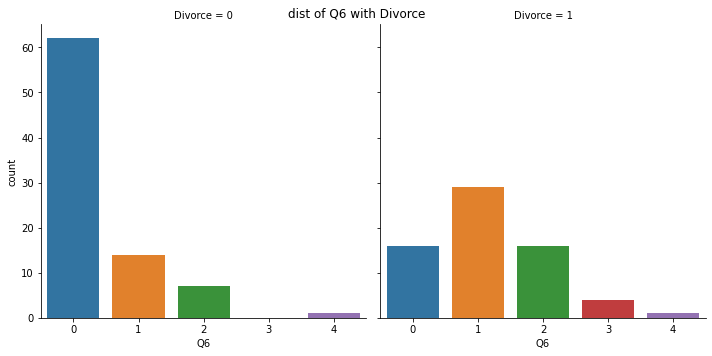

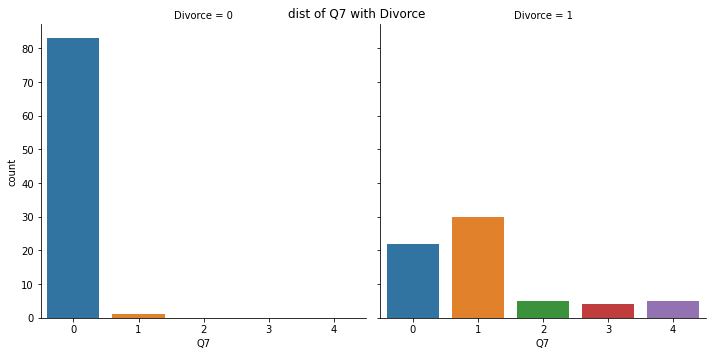

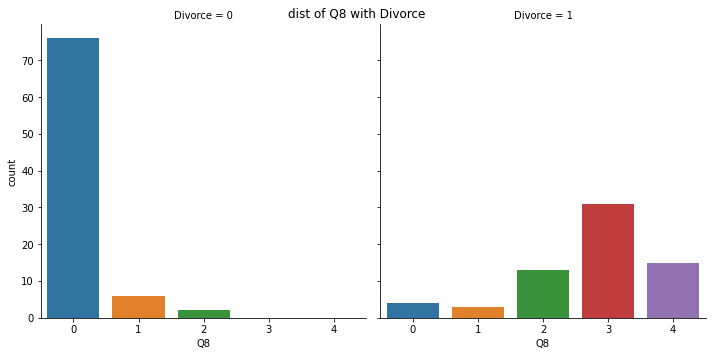

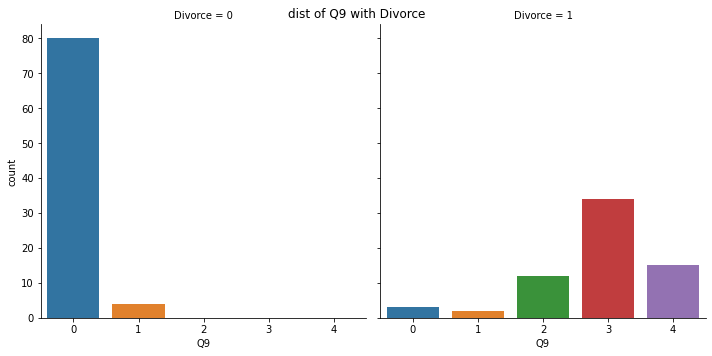

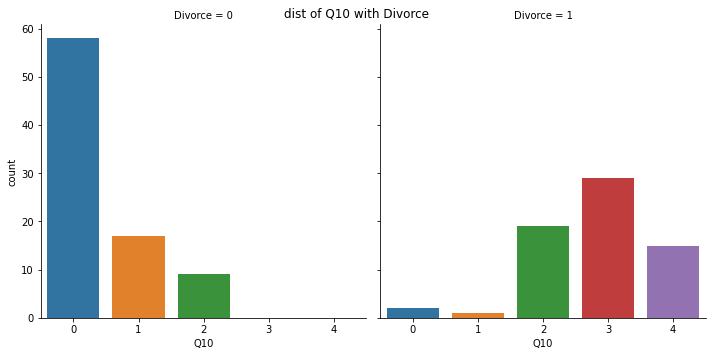

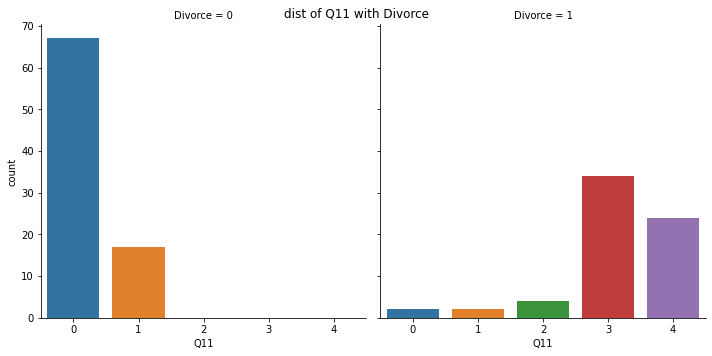

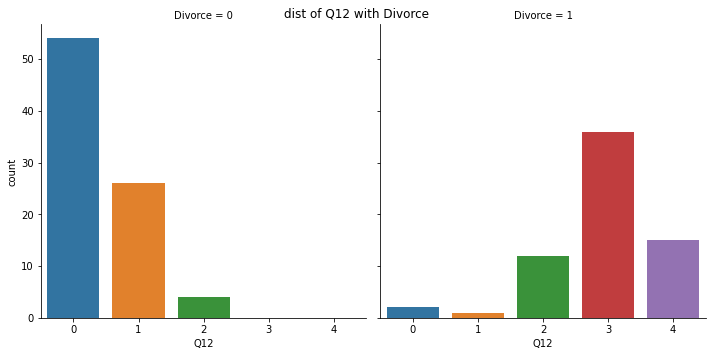

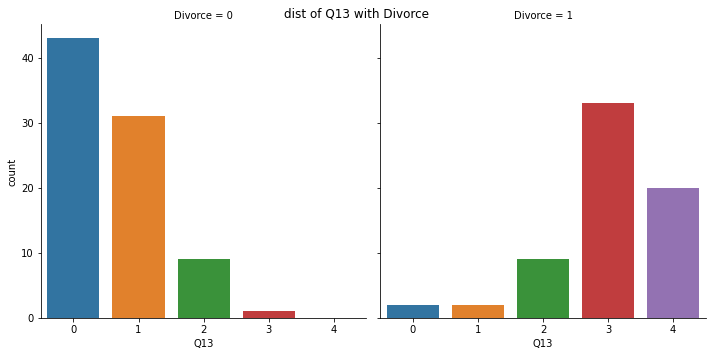

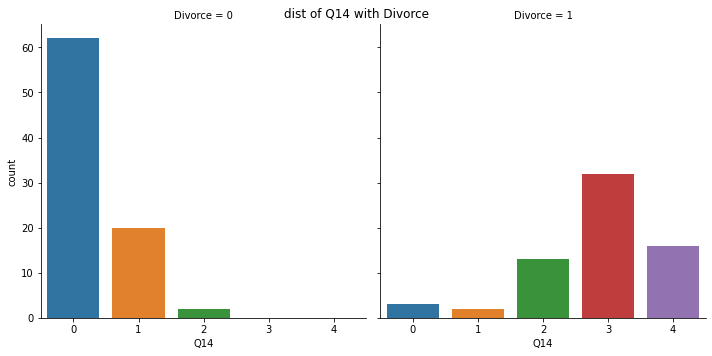

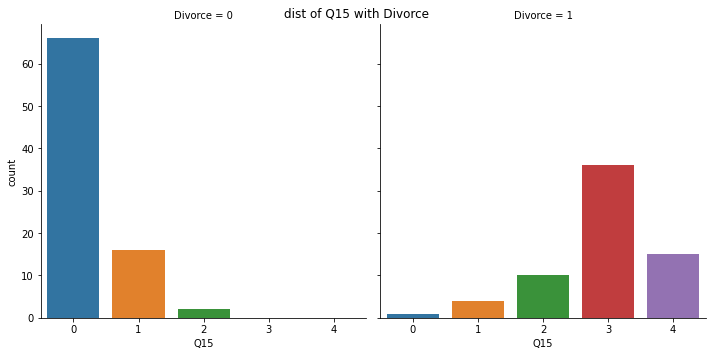

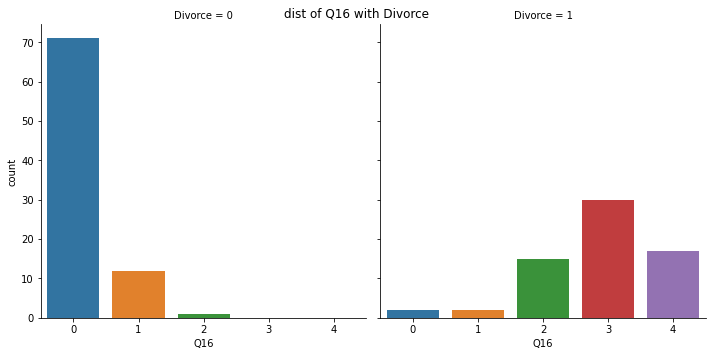

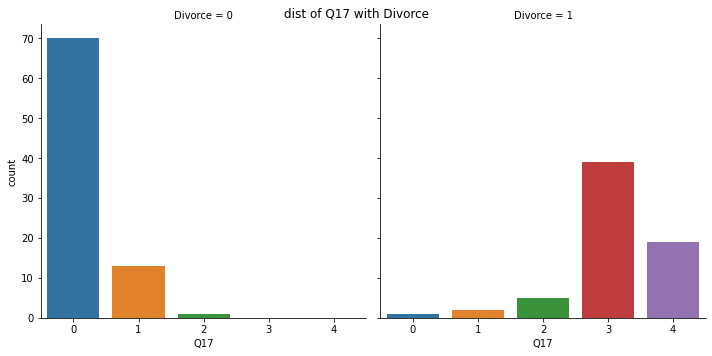

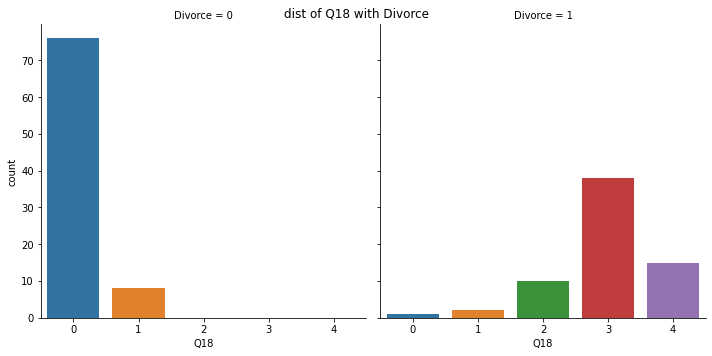

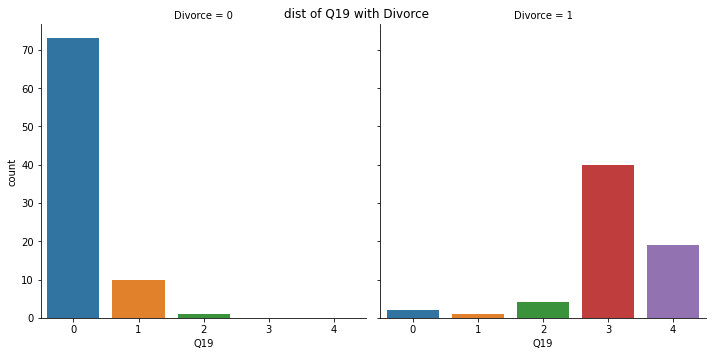

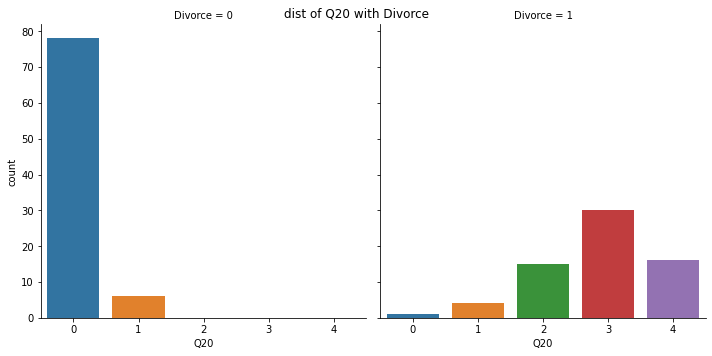

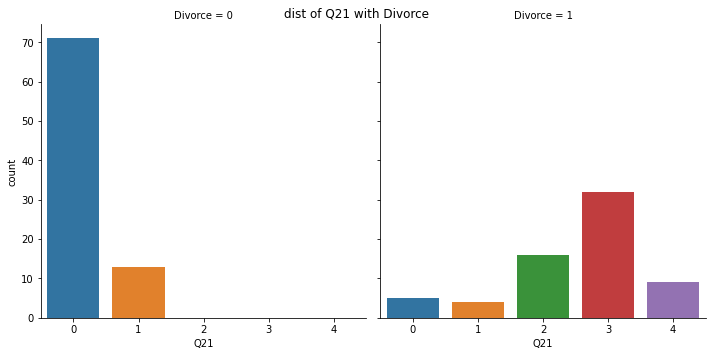

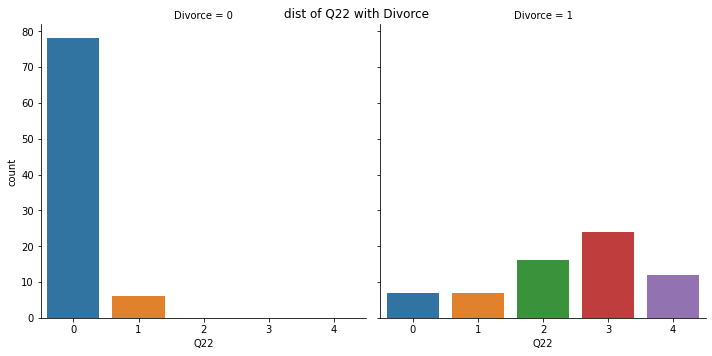

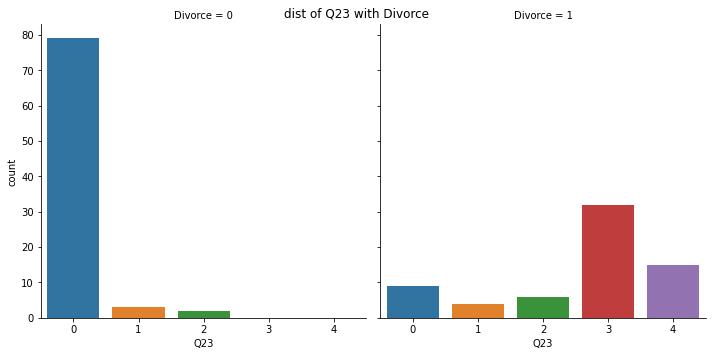

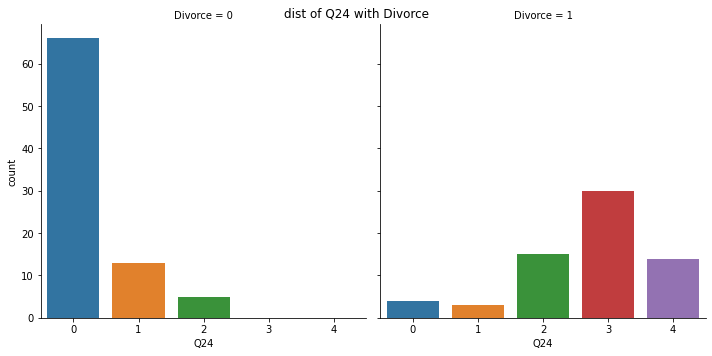

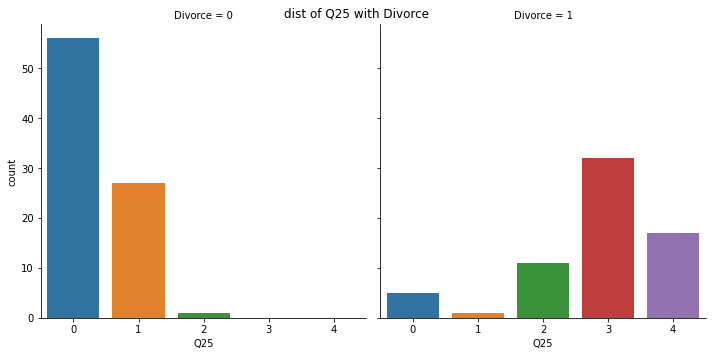

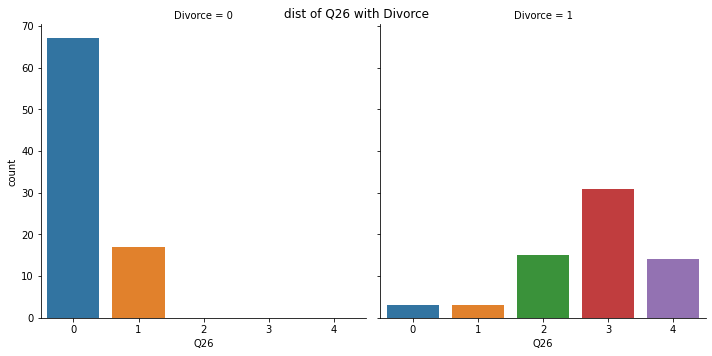

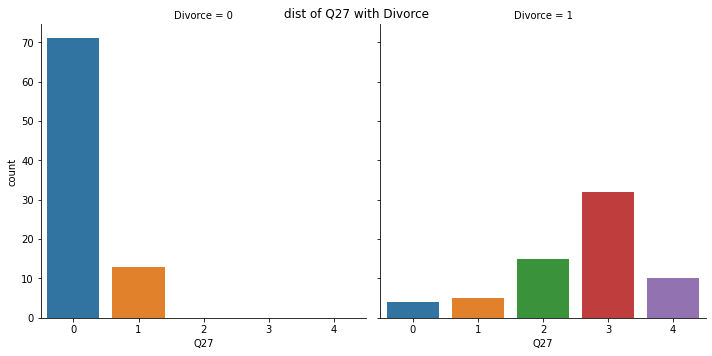

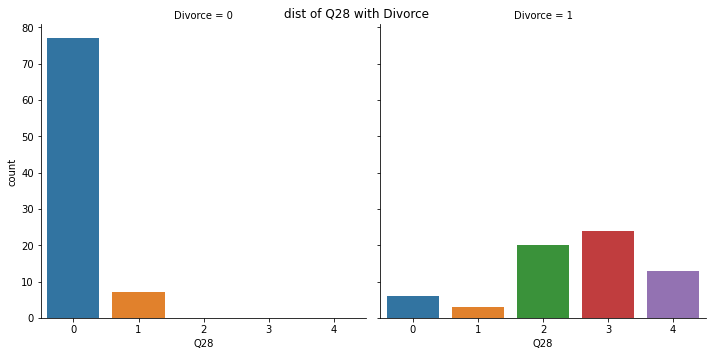

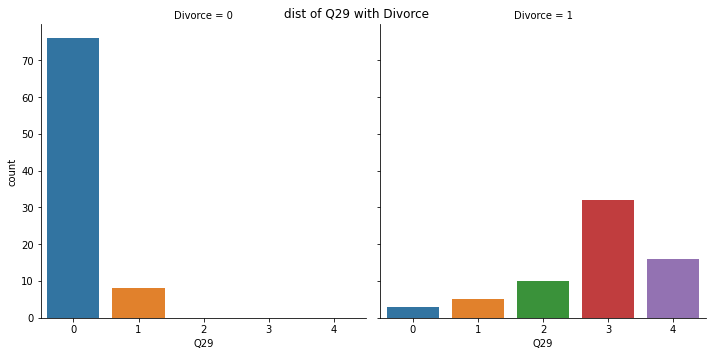

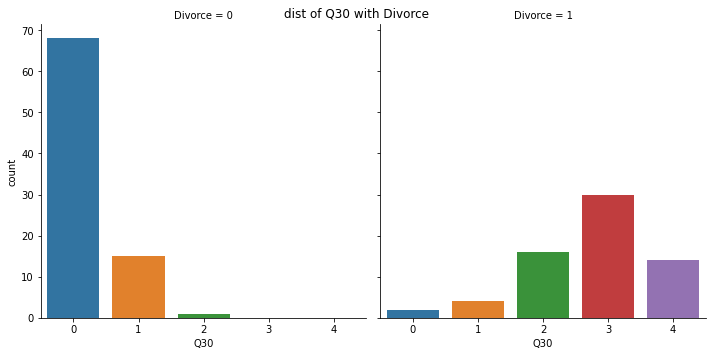

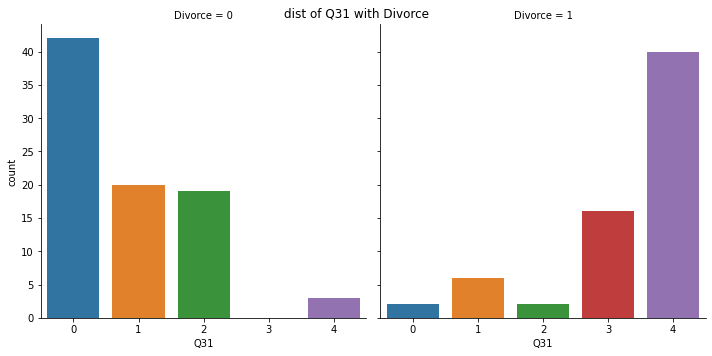

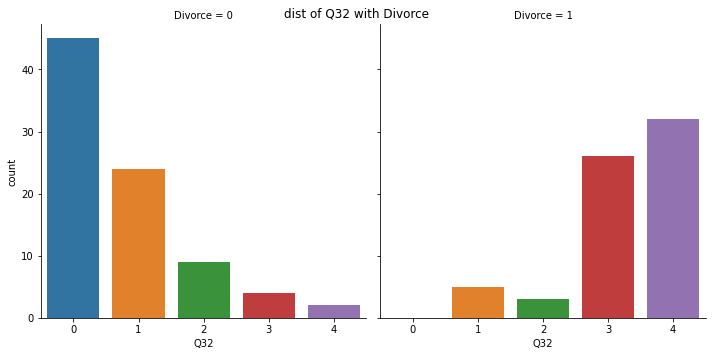

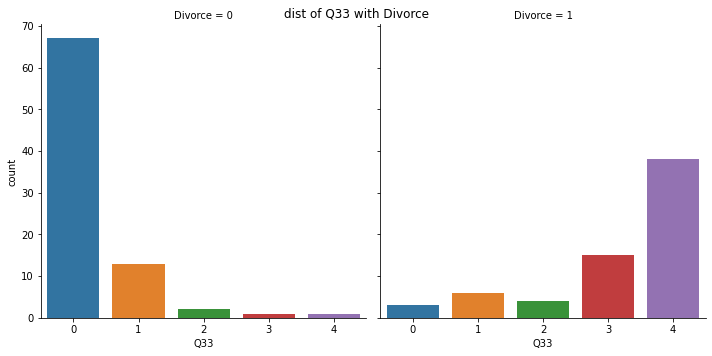

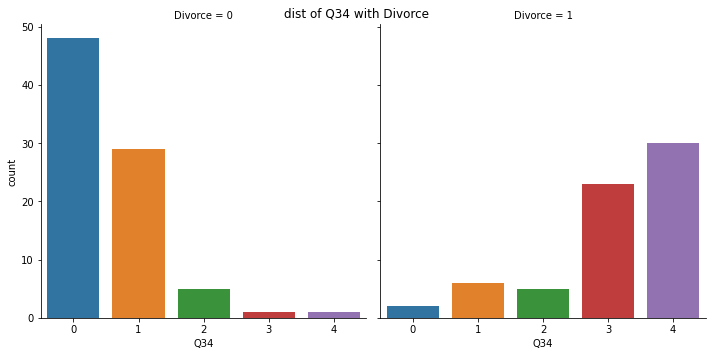

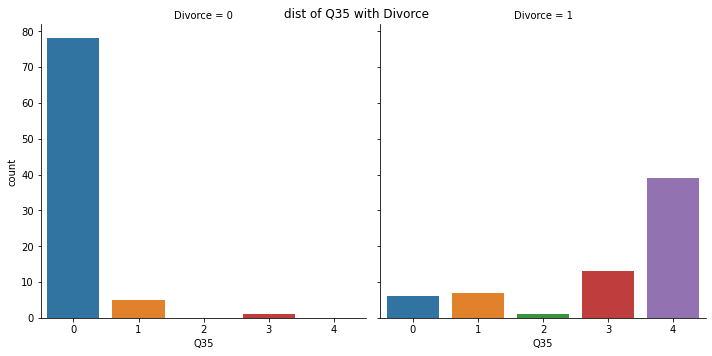

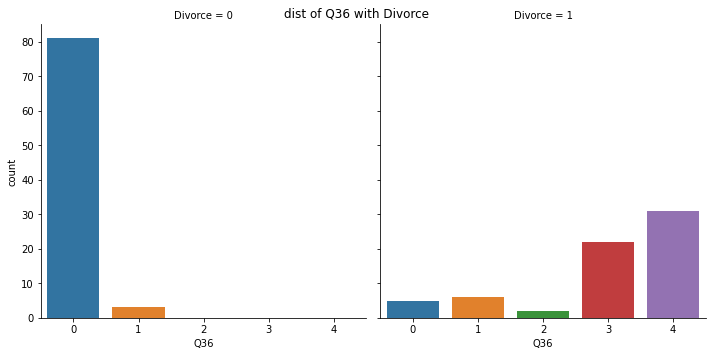

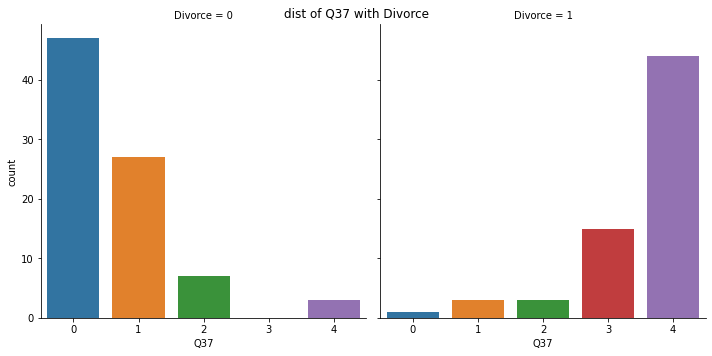

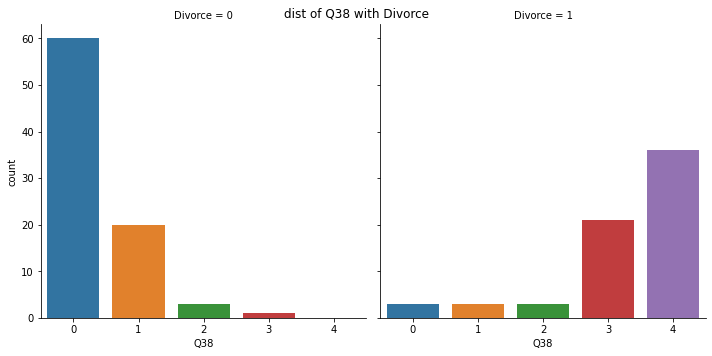

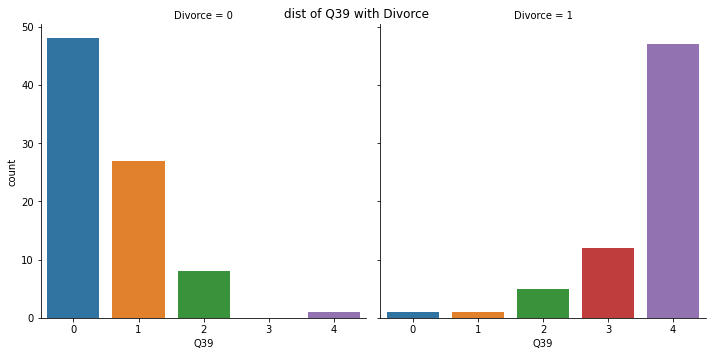

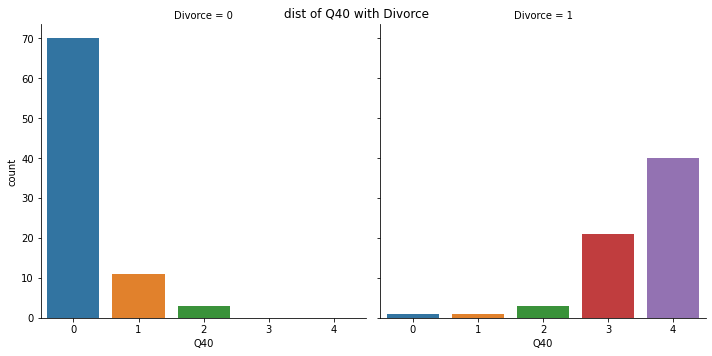

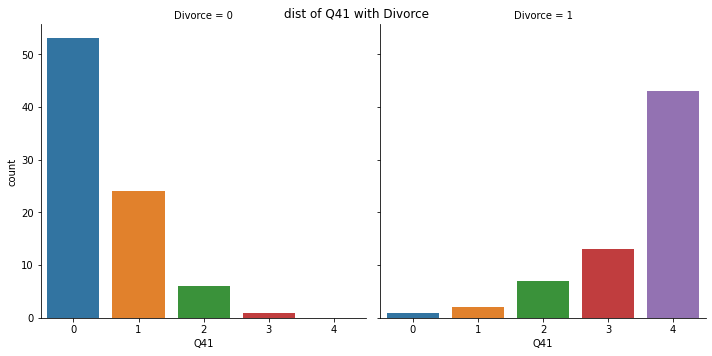

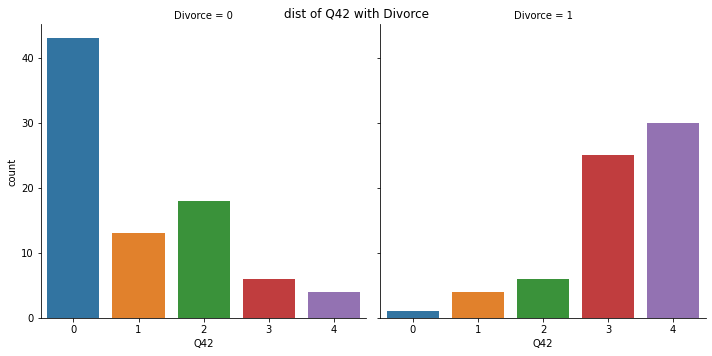

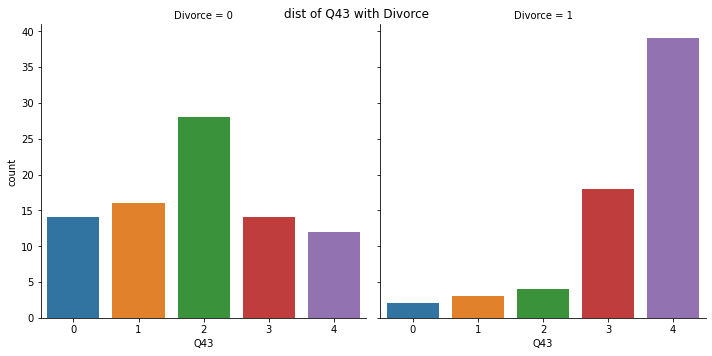

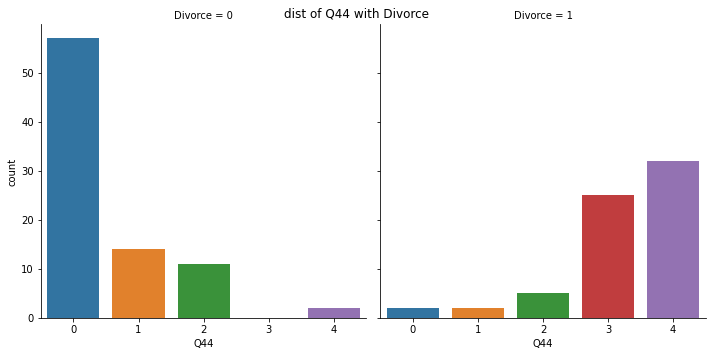

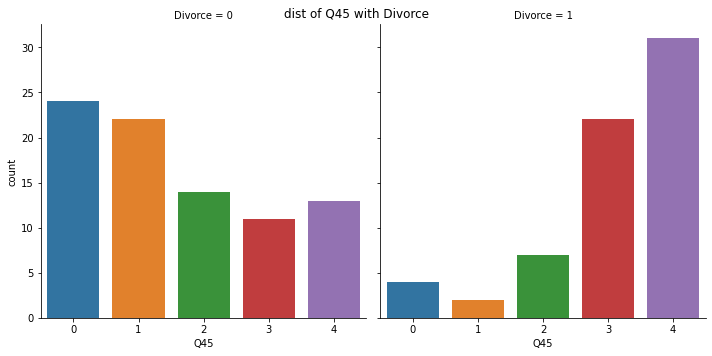

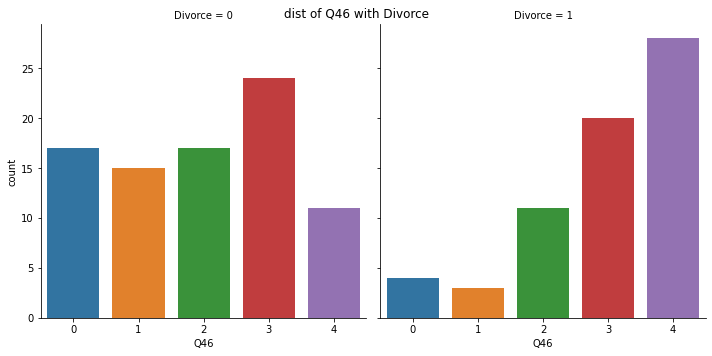

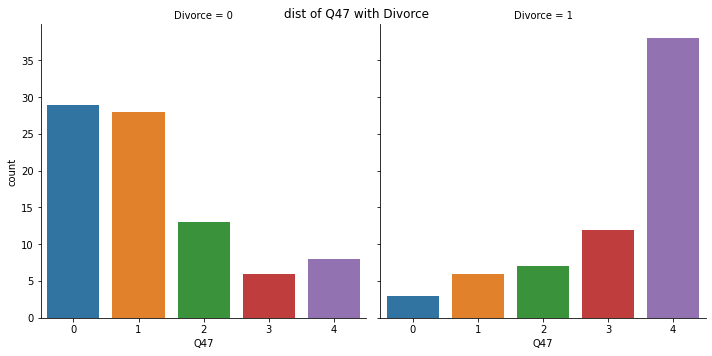

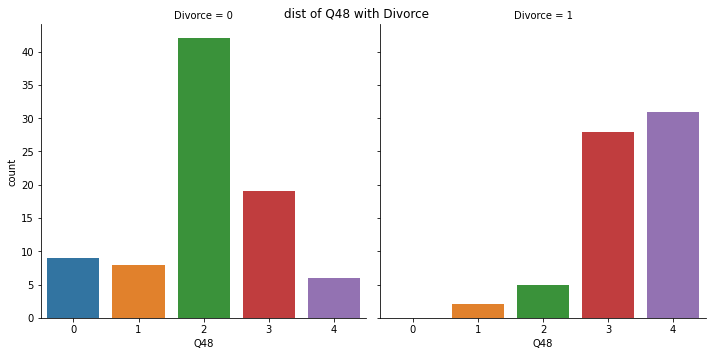

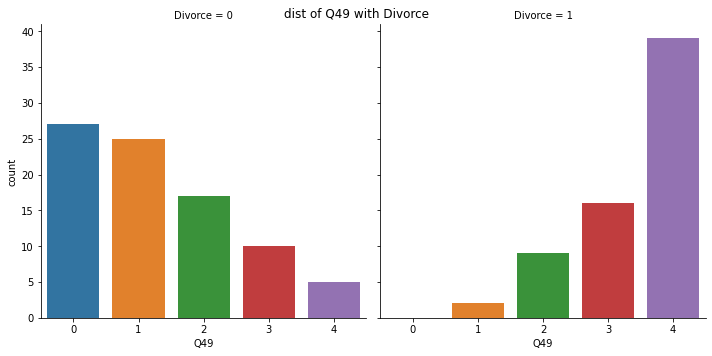

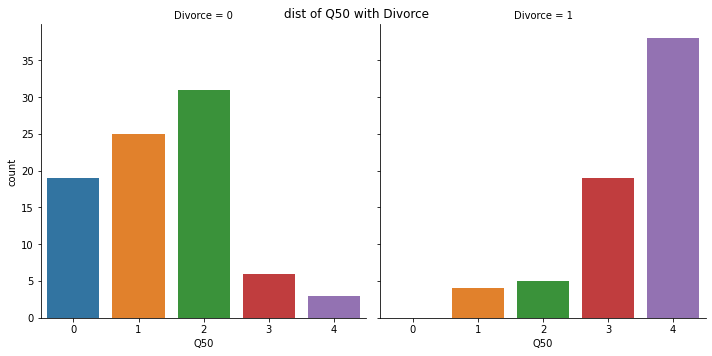

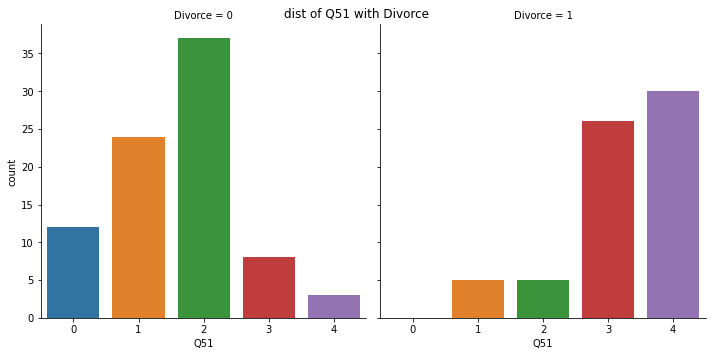

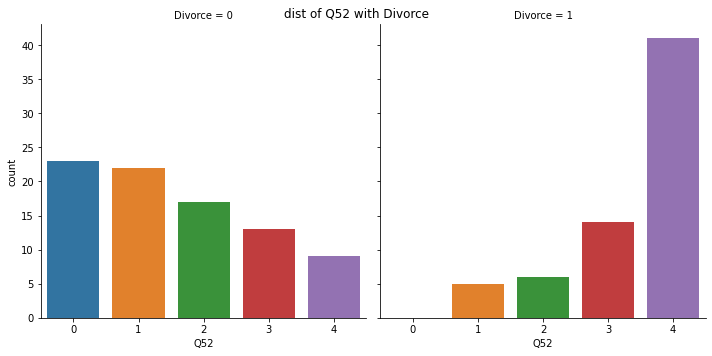

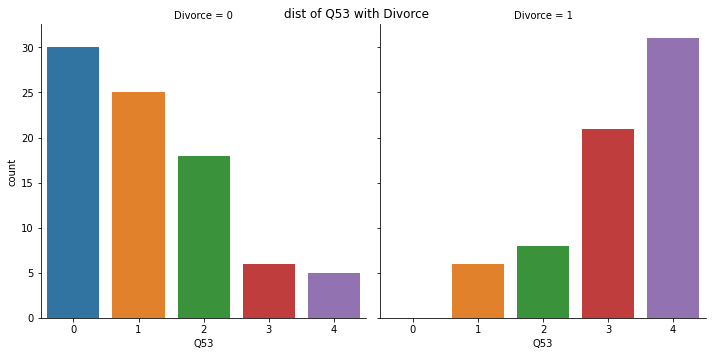

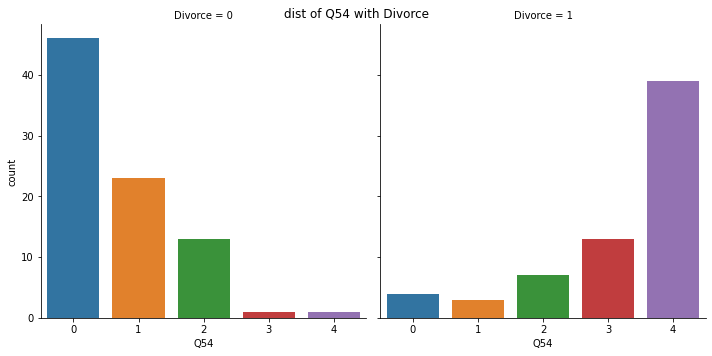

In [31]:
for i in df_copy.drop('Divorce',axis =1).columns:
    dis_q_divorce(i)

We can infer that the most distribution of questions answered by married people are left skewed and divorcees is rightly skewed except for Q6 Q7 Q43 Q45 Q46 Q48 Q50 Q51 will check more on this?

In [32]:
# Agreeble questions
question_ag = ['Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53']

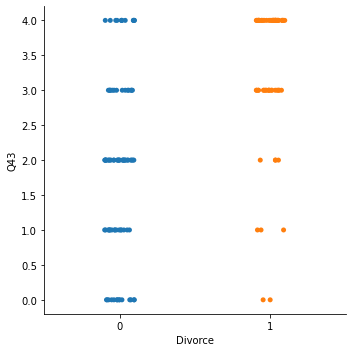

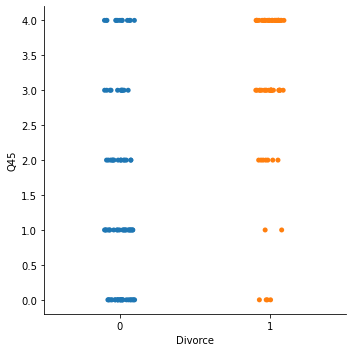

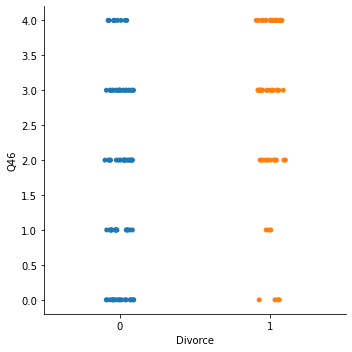

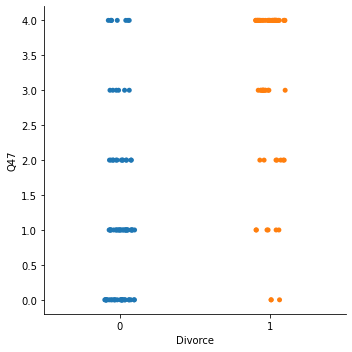

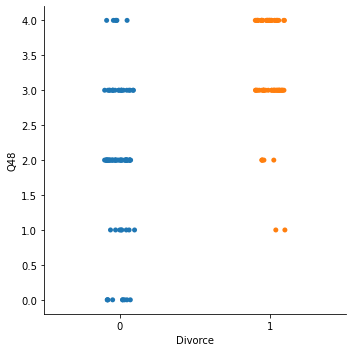

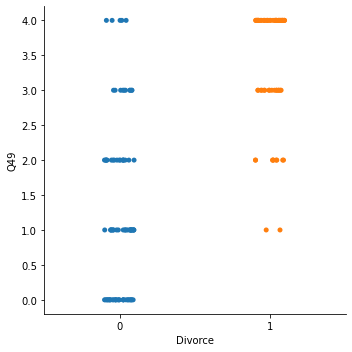

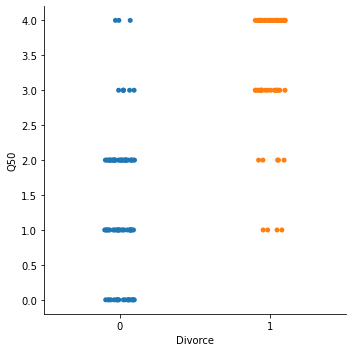

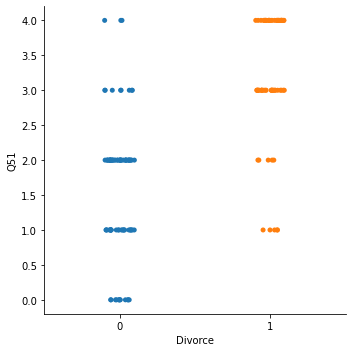

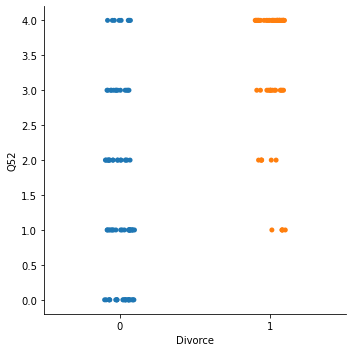

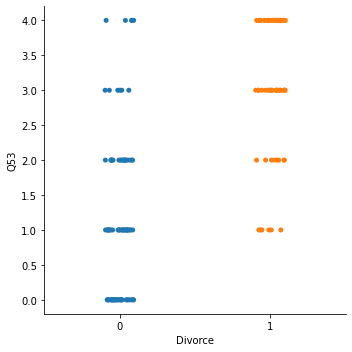

In [33]:
for i in question_ag:    
    sns.catplot(x="Divorce",y =i ,data = df_copy)

All of these questions ['Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53'] answers couldn't infer if participants were divorced explicity although divorcees answers were more positive

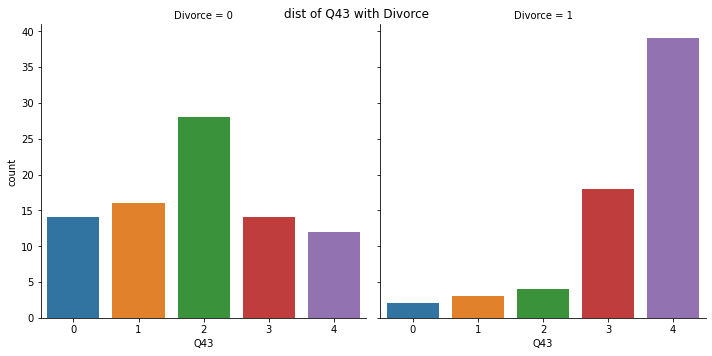

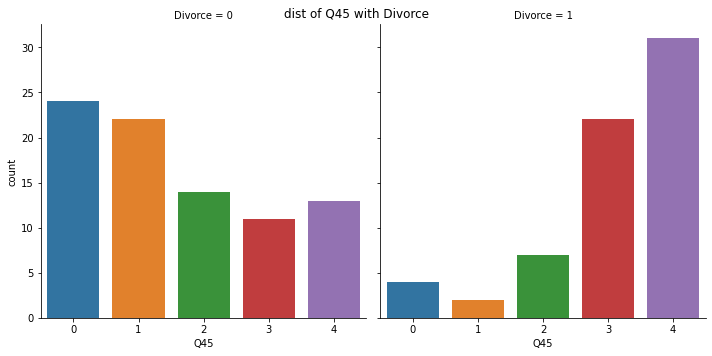

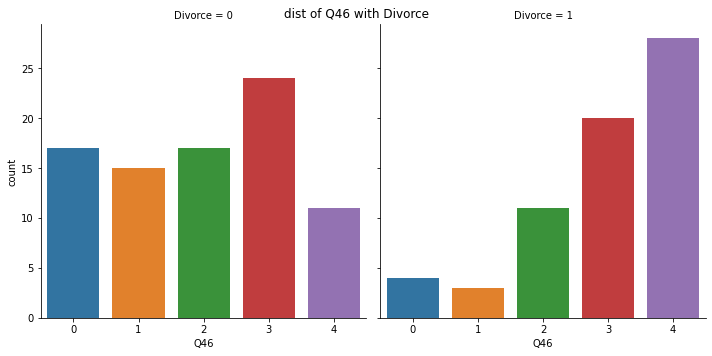

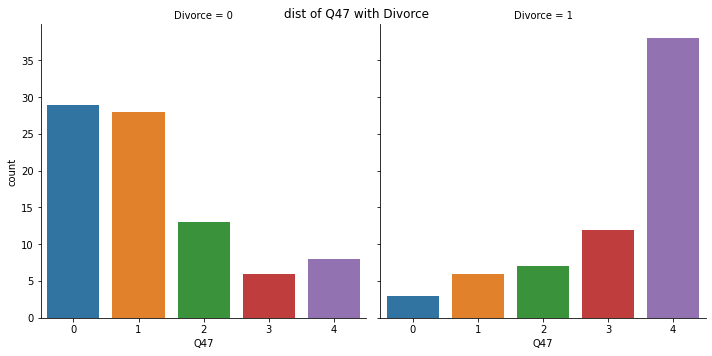

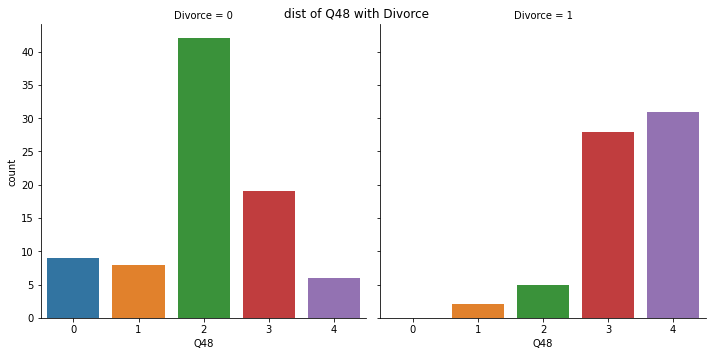

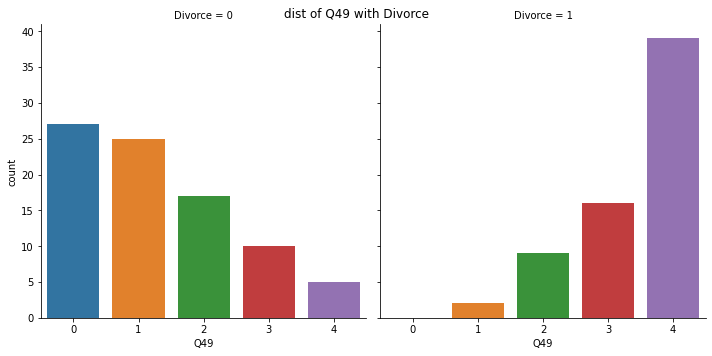

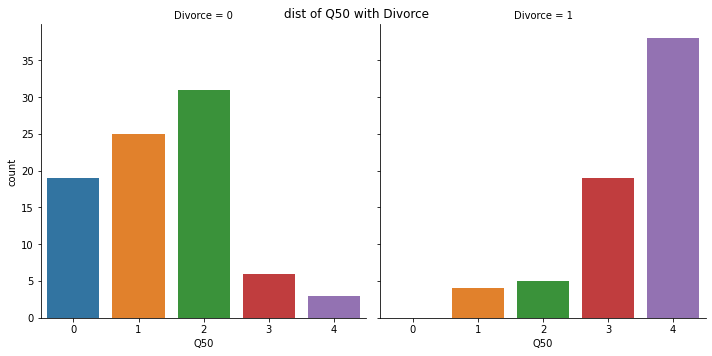

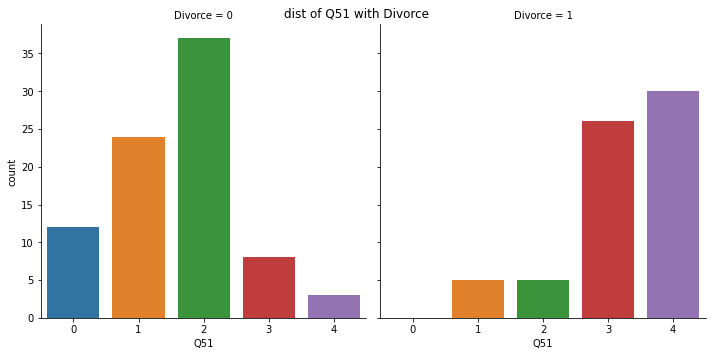

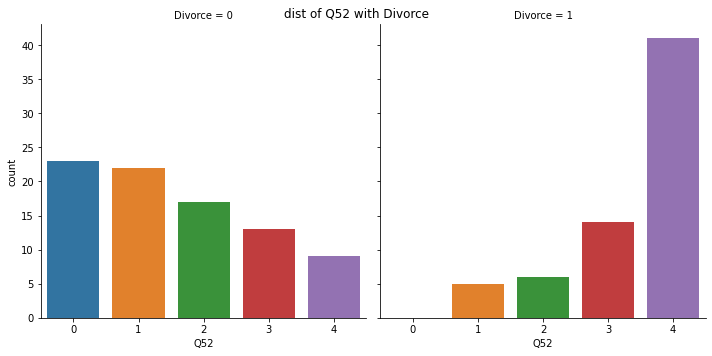

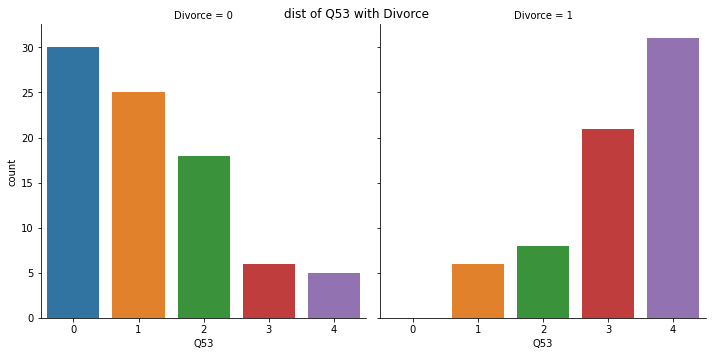

In [34]:
for i in question_ag:    
     dis_q_divorce(i)

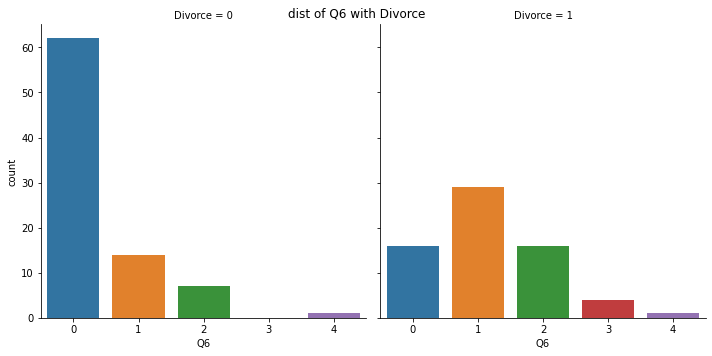

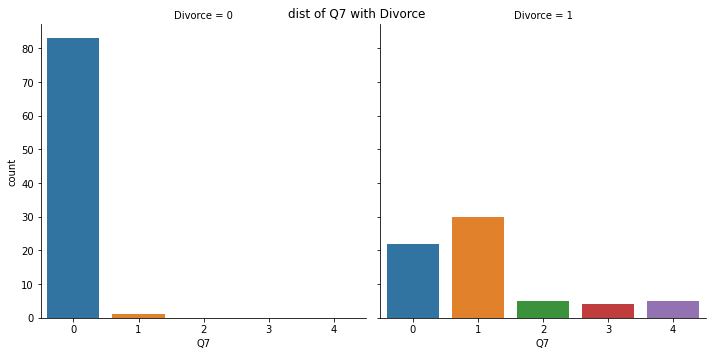

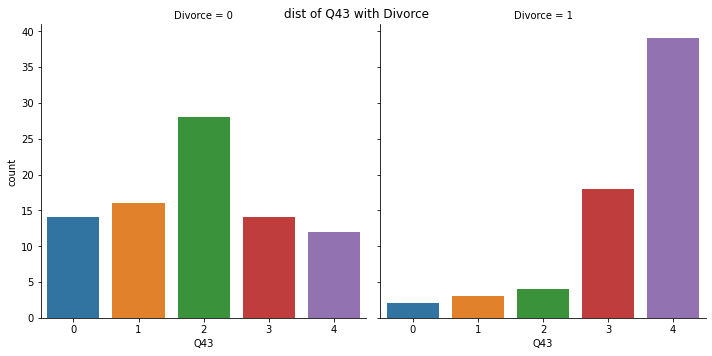

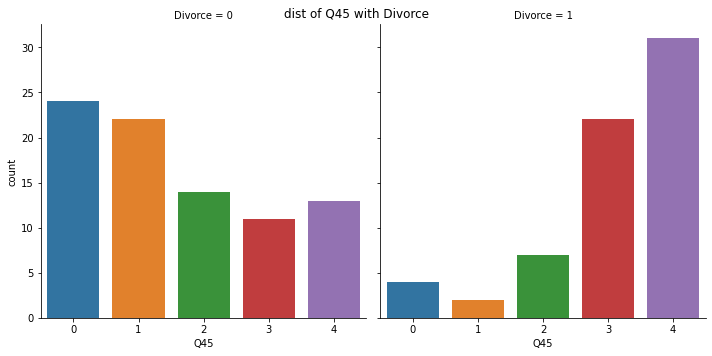

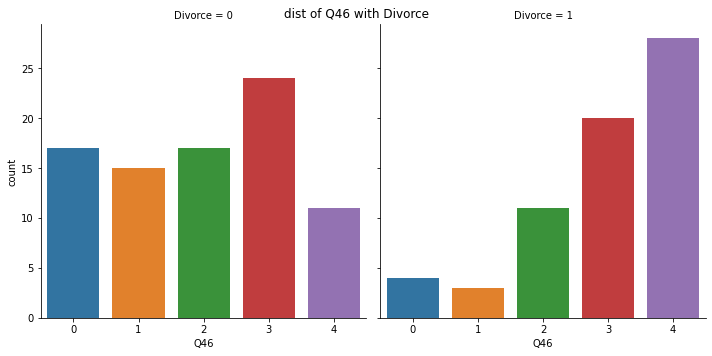

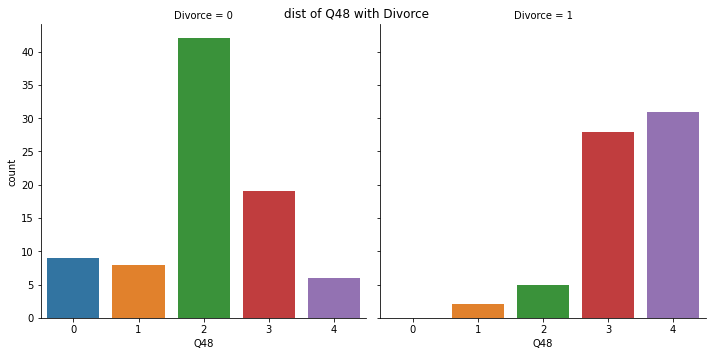

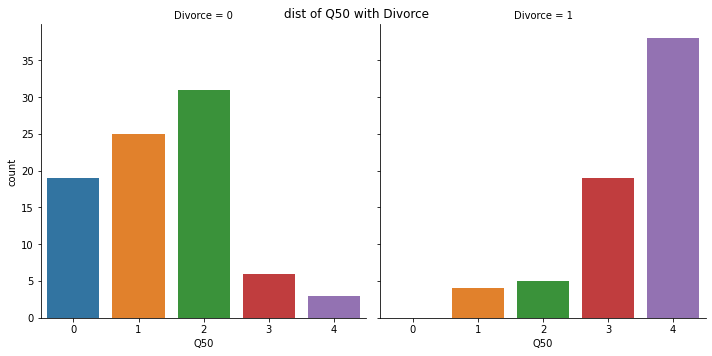

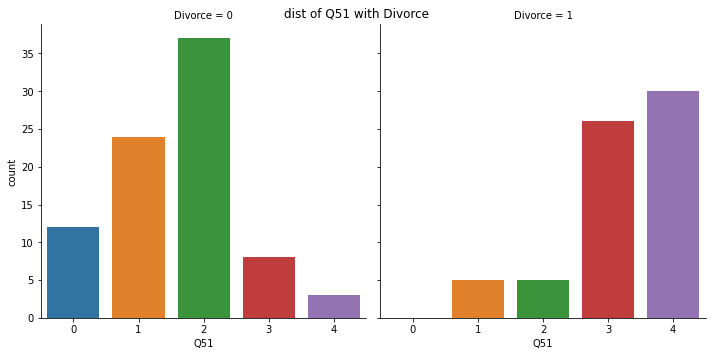

In [35]:
for i in ['Q6', 'Q7', 'Q43', 'Q45', 'Q46', 'Q48' ,'Q50' ,'Q51']:    
     dis_q_divorce(i)

Based on the above plots:
- We can infer that most people both married and divorced disagree with Q7, Q6 though everyone who agreed with the question 7 is divorced.
- Married couples answers varied across Q43, Q45, Q46
- Q50 & Q51 more divorced people blamed the other spouse for problems while most married people said both parties are equally at fault
- Q48 most married people also agreed that both parties are equal about who's right during discussions while divorced felt they were the right ones 

<a id='conclusions'></a>
## Conclusions

Against my better judgdement more divorced people agreed with questions 10-30 probably means these where negative questions meaning a positive answer meant a negative feeling 
Otherwise so there's a problem with the dataset considering positive answers to theses questions state a good marriage and mainly divorcees had a positive answer to these questions

<a id='model'></a>
## Modelling 

In [36]:
# importing more libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
#We scale our datset and then fit our dataset into our logistic regression model
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(divorce), columns = divorce.columns)
feature_df = normalized_df.drop('Divorce', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(feature_df,divorce['Divorce'],
                                                    test_size = 0.3, random_state=42)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [38]:
#We perform cross validation on our dataset
cv = cross_validate(LogisticRegression(), x_train, y_train, cv = 10,
                    scoring = ['accuracy', 'precision', 'recall', 'f1'],
                    return_train_score = True)
print('Average training accuracy: {}'.format(cv['train_accuracy'].mean()))
print('Average training precision score: {}'.format(cv['train_precision'].mean()))
print('Average training recall score: {}'.format(cv['train_recall'].mean()))
print('Average training f1 score: {}'.format(cv['train_f1'].mean()))

Average training accuracy: 1.0
Average training precision score: 1.0
Average training recall score: 1.0
Average training f1 score: 1.0


In [39]:
#We evaluate our test data using metrics such as accuracy, precision, goodness of fit e.t.c
from sklearn.metrics import confusion_matrix
predictions = lr.predict(x_test)
score = accuracy_score(y_test, predictions)
r2 = r2_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# f1_score = f1_score(y_test, predictions)
f1_score = 2*(recall * precision) / (recall + precision)
print('The percentage of test accuracy is {} {}'.format((round(score, 3))*100, '%'))
print('The goodness of fit of our model is {} {}'.format((round(r2, 3))*100, '%'))
print('The precision of our model is {} {}'.format((round(precision, 3))*100, '%'))
print('The recall of our model is {} {}'.format((round(recall, 3))*100, '%'))
print('The f1 score of our model is {} {}'.format((round(f1_score, 3))*100, '%'))

The percentage of test accuracy is 95.6 %
The goodness of fit of our model is 82.1 %
The precision of our model is 100.0 %
The recall of our model is 91.7 %
The f1 score of our model is 95.7 %


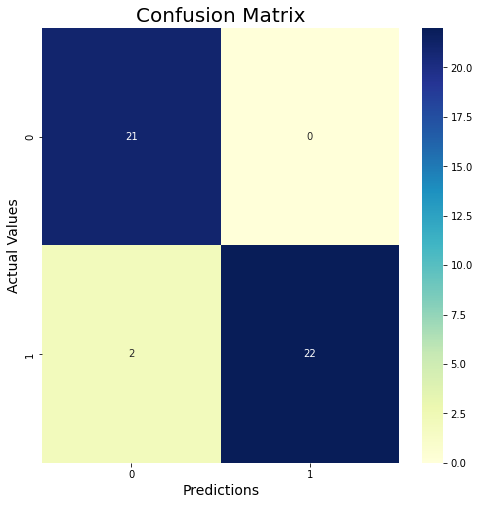

In [40]:
#We plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
conf_df = pd.DataFrame(cm, columns = [0, 1], index = [0, 1])
plt.title('Confusion Matrix', size=20)
sns.heatmap(conf_df, annot=True, cmap="YlGnBu")
plt.xlabel('Predictions', size=14)
plt.ylabel('Actual Values', size=14);

From our confusion matrix there are 2 false positives and no false negatives and we have an accuracy of 95.6%

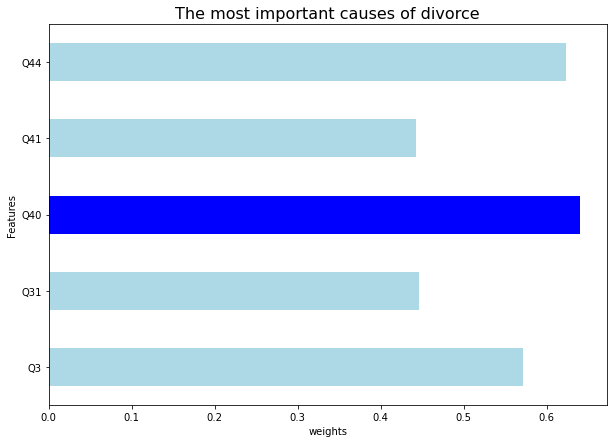

In [41]:
#We check the most important features based on the weights assigned to each during training
coef_df = pd.Series([x for x in lr.coef_[0]], index = feature_df.columns)
most_imp = coef_df[abs(coef_df)>0.4]
plt.figure(figsize=(10,7))
plt.title('The most important causes of divorce', size = 16)
plt.xlabel('weights')
plt.ylabel('Features')
most_imp.plot(kind='barh', color = ['lightblue','lightblue', 'blue', 
                                    'lightblue', 'lightblue']);

The most important feature is Q40 according to the bar chart.

In [42]:
coef_df = pd.DataFrame({'features': df_copy.drop("Divorce",axis=1).columns, 'weights': [x for x in lr.coef_[0]]})
ref_coef = pd.merge(coef_df, ref, how = 'inner', on = 'features')

## Feature Selection

In [43]:
#feature selection using L1 regularization
lasso = LogisticRegression(solver = 'liblinear',penalty='l1')
lasso.fit(x_train, y_train)
lasso_df = pd.DataFrame({'lasso_weights':[x for x in lasso.coef_[0]], 
                        'features':x_train.columns})
len(lasso_df[lasso_df['lasso_weights'] != 0])

10

From the cell above, using L1 Regularization, only ten of our features were not reduced to 0

In [45]:
#We list features that were not reduced to 0
feat_exp = pd.merge(lasso_df, ref_coef, how = 'inner', on = 'features')
feat_exp[feat_exp['lasso_weights'] != 0][['description',
                                         'lasso_weights', 'features']]

,description,lasso_weights,features
2,"When we need it, we can take our discussions w...",0.446771,Q3
5,We don't have time at home as partners.,0.022467,Q6
14,Our dreams with my spouse are similar and harm...,0.340133,Q15
16,We share the same views about being happy in o...,0.804543,Q17
19,My spouse and I have similar values in trust.,0.604773,Q20
25,I know my spouse's basic anxieties.,0.057415,Q26
30,I feel aggressive when I argue with my spouse.,0.051385,Q31
39,We're just starting a discussion before I know...,1.998244,Q40
40,"When I talk to my spouse about something, my c...",0.460952,Q41
43,Sometimes I think it's good for me to leave ho...,0.873883,Q44


In [44]:
#We train our model with features with non_zero weights
upd_mod = LogisticRegression()
feat_mod = feat_exp[feat_exp['lasso_weights'] != 0]
best_feat = [x for x in feat_mod['features']]
upd_mod.fit(x_train[best_feat], y_train)
reg_pred = upd_mod.predict(x_test[best_feat])

In [45]:
#We test our model using the various metrics listed in the output
score = accuracy_score(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)
precision = precision_score(y_test, reg_pred)
recall = recall_score(y_test, reg_pred)
# f1_score = f1_score(y_test, predictions)
f1_score = 2*(recall * precision) / (recall + precision)
print('The percentage of test accuracy is {} {}'.format((round(score, 3))*100, '%'))
print('The goodness of fit of our model is {} {}'.format((round(r2, 3))*100, '%'))
print('The precision of our model is {} {}'.format((round(precision, 3))*100, '%'))
print('The recall of our model is {} {}'.format((round(recall, 3))*100, '%'))
print('The f1 score of our model is {} {}'.format((round(f1_score, 3))*100, '%'))

The percentage of test accuracy is 95.6 %
The goodness of fit of our model is 82.1 %
The precision of our model is 100.0 %
The recall of our model is 91.7 %
The f1 score of our model is 95.7 %


We see that the metrics of our regularized model doesn't change from our original model

In [49]:
# save model
import pickle

In [50]:
pickle.dump(upd_mod,open('divorce_mod.pkl','wb'))